# Bubble sort not optimized time complexity histograms for permutations of $n$ different elements 

## Best case - increasingly orted array ($\frac{n^2-n}{2}$ comparisons + $0$ swaps) - $T(n) = \frac{n^2-n}{2} = \Theta(n^2) $

## Worst case - de creasingly sorted array ($\frac{n^2-n}{2}$ comparisons + $\frac{n^2-n}{2}$  swaps) - $T(n) = n^2-n = \Theta(n^2) $

## Average case - expected number of comparisons + swaps on random unifrom permutation of $n$ different elements $T(n) = \frac{3}{4}(n^2-n)= \Theta(n^2) $



In [1]:
from itertools import permutations
 
n = 3
perm = permutations(range(1,n+1))

ls =  [] 
# Print the obtained permutations
for i in list(perm):
    print(i)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [2]:
def bubbleSort(arr):
    steps = 0
    n = len(arr)
 
    # Traverse through all array elements
    for i in range(n):
 
        # Last i elements are already in place
        for j in range(0, n-i-1):
 
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            steps +=1
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
                steps +=1
    return(steps)
 


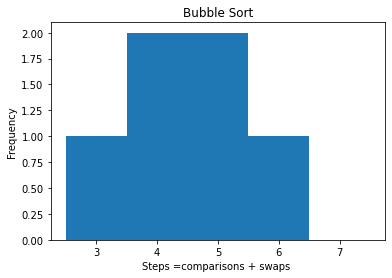

n 3
number of permutations n! = 6
exp min = 3
min formula (n-1)*n/2 = 3.0
exp max = 6
max formula (n-1)*n = 6
exp mean = 4.5
mean formula 3/4*n**2+17/4*n-4 = 4.5
stdev 0.9574271077563381


In [3]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

n = 3
perm = permutations(range(1,n+1))

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps =comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations n! =",math.factorial(n)) 
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula 3/4*n**2+17/4*n-4 =",(3/4)*(n**2-n))
print("stdev",np.std(times))


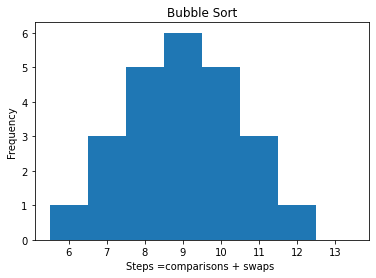

n 4
number of permutations n! = 24
exp min = 6
min formula (n-1)*n/2 = 6.0
exp max = 12
max formula (n-1)*n = 12
exp mean = 9.0
mean formula (3/4)*(n**2-n) = 9.0
stdev 1.4719601443879744


In [4]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

n = 4
perm = permutations(range(1,n+1))

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps =comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations n! =",math.factorial(n))
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("stdev",np.std(times))

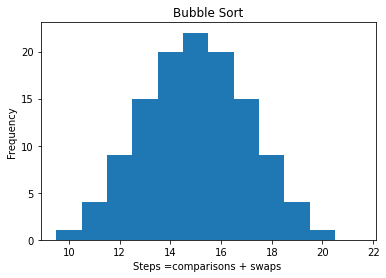

n 5
number of permutations n! = 120
exp min = 10
min formula (n-1)*n/2 = 10.0
exp max = 20
max formula (n-1)*n = 20
exp mean = 15.0
mean formula (3/4)*(n**2-n) = 15.0
stdev 2.041241452319315


In [5]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

n = 5
perm = permutations(range(1,n+1))

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps =comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations n! =",math.factorial(n))
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("stdev",np.std(times))

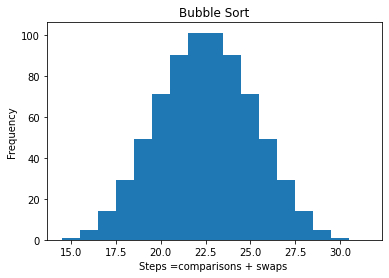

n 6
number of permutations n! = 720
exp min = 15
min formula (n-1)*n/2 = 15.0
exp max = 30
max formula (n-1)*n = 30
exp mean = 22.5
mean formula (3/4)*(n**2-n) = 22.5
stdev 2.661453237111885


In [6]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

n = 6
perm = permutations(range(1,n+1))

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps =comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations n! =",math.factorial(n))
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("stdev",np.std(times))

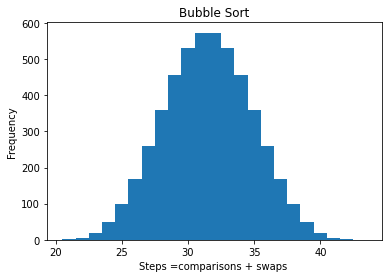

n 7
number of permutations n! = 5040
exp min = 21
min formula (n-1)*n/2 = 21.0
exp max = 42
max formula (n-1)*n = 42
exp mean = 31.5
mean formula (3/4)*(n**2-n) = 31.5
stdev 3.3291640592396967


In [7]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math
 
n = 7
perm = permutations(range(1,n+1))

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps =comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations n! =",math.factorial(n))
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("stdev",np.std(times))

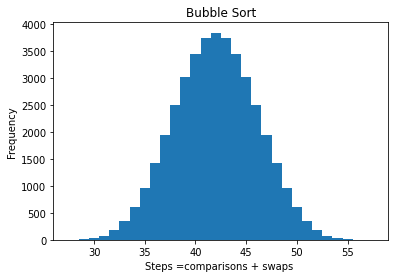

n 8
number of permutations n! = 40320
exp min = 28
min formula (n-1)*n/2 = 28.0
exp max = 56
max formula (n-1)*n = 56
exp mean = 42.0
mean formula (3/4)*(n**2-n) = 42.0
stdev 4.041451884327381


In [8]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

n = 8
perm = permutations(range(1,n+1))

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps =comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations n! =",math.factorial(n))
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("stdev",np.std(times))

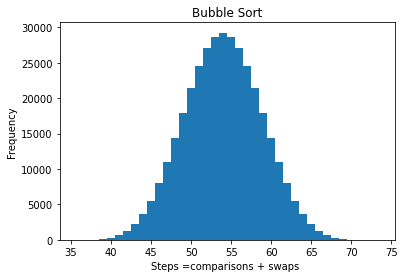

n 9
number of permutations n! = 362880
exp min = 36
min formula (n-1)*n/2 = 36.0
exp max = 72
max formula (n-1)*n = 72
exp mean = 54.0
mean formula (3/4)*(n**2-n) = 54.0
stdev 4.795831523312719


In [9]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math
 
n = 9
perm = permutations(range(1,n+1))

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps =comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations n! =",math.factorial(n))
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("stdev",np.std(times))

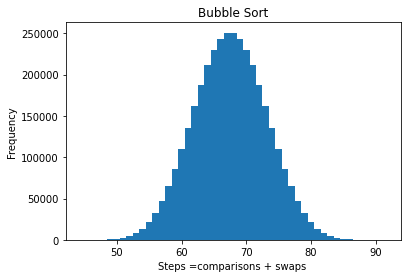

n 10
number of permutations n! = 3628800
exp min = 45
min formula (n-1)*n/2 = 45.0
exp max = 90
max formula (n-1)*n = 90
exp mean = 67.5
mean formula (3/4)*(n**2-n) = 67.5
stdev 5.5901699437494745


In [10]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math
 
n = 10
perm = permutations(range(1,n+1))

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps =comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations n! =",math.factorial(n))
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("stdev",np.std(times))

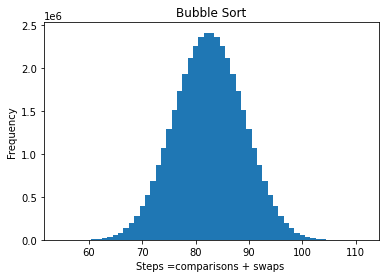

n 11
number of permutations  n! = 39916800
exp min = 55
min formula (n-1)*n/2 = 55.0
exp max = 110
max formula (n-1)*n = 110
exp mean = 82.5
mean formula (3/4)*(n**2-n) = 82.5
stdev 6.422616289332565


In [11]:
from itertools import permutations
import matplotlib.pyplot as plt
import numpy as np 
import math

n = 11
perm = permutations(range(1,n+1))

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps =comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations  n! =",math.factorial(n))
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2-n) =",(3/4)*(n**2-n))
print("stdev",np.std(times))


# Average case - expected number of comparisons + swaps on random unifrom permtation of $n$ diffrent elementns $T(n) = \frac{3}{4}(n^2-n)= \Theta(n^2) $

In [12]:
# Average case on random unifrom permtation of  n 3/4 (**2 -n)
import numpy as np 
import pandas as pd
import scipy.linalg as la

n = np.array([3.0,4.0,5.0,6.0])    # Number n of sorted elments 
t = np.array([4.5,9.0, 15.0,22.5]) # Average comparisons + swaps for the corresponding n 

data = pd.DataFrame({'n': n, 't': t})
data



,n,t
0,3.0,4.5
1,4.0,9.0
2,5.0,15.0
3,6.0,22.5


In [13]:
# Interpolating a polynomial of degree 3

X = np.column_stack([n**0,n**1,n**2,n**3])
a = la.solve(X,t)
a

array([ 0.  , -0.75,  0.75,  0.  ])

# Bubble sort not optimized time complexity histograms for permutations of $n$  elements with repetitions

## Best case - increasingly orted array ($\frac{n^2-n}{2}$ comparisons + $0$ swaps) - $T(n) = \frac{n^2-n}{2} = \Theta(n^2) $

## Worst case - de creasingly sorted array ($\frac{n^2-n}{2}$ comparisons + $\frac{n^2-n}{2}$  swaps) - $T(n) = n^2-n = \Theta(n^2) $

## Average case - expected number of comparisons + swaps on random unifrom permutation of $n$ different elements $T(n) = \frac{3}{4}n^2 - n +\frac{1}{4}= \Theta(n^2) $

In [14]:
from itertools import product

n=3 
perm = product(range(1,n+1), repeat = n)

c=0
for i in perm:
    print(i)
    c+=1

print(c)

(1, 1, 1)
(1, 1, 2)
(1, 1, 3)
(1, 2, 1)
(1, 2, 2)
(1, 2, 3)
(1, 3, 1)
(1, 3, 2)
(1, 3, 3)
(2, 1, 1)
(2, 1, 2)
(2, 1, 3)
(2, 2, 1)
(2, 2, 2)
(2, 2, 3)
(2, 3, 1)
(2, 3, 2)
(2, 3, 3)
(3, 1, 1)
(3, 1, 2)
(3, 1, 3)
(3, 2, 1)
(3, 2, 2)
(3, 2, 3)
(3, 3, 1)
(3, 3, 2)
(3, 3, 3)
27


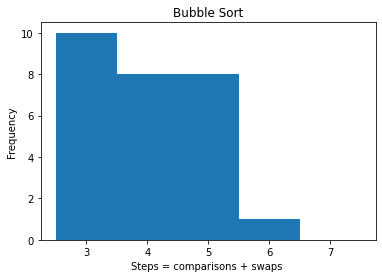

n 3
number of permutations ,n**n =  27
exp min = 3
min formula (n-1)*n/2 = 3.0
exp max = 6
max formula (n-1)*n = 6
exp mean = 4.0
mean formula (3/4)*(n**2)-n+(1/4) = 4.0
stdev 0.90267093384844


In [15]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 

n = 3
perm = product(range(1,n+1), repeat = n)

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps = comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations ,n**n = ",n**n)
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2)-n+(1/4) =",(3/4)*(n**2)-n+(1/4))
print("stdev",np.std(times))

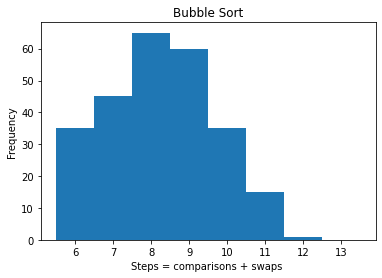

n 4
number of permutations ,n**n =  256
exp min = 6
min formula (n-1)*n/2 = 6.0
exp max = 12
max formula (n-1)*n = 12
exp mean = 8.25
mean formula (3/4)*(n**2)-n+(1/4) = 8.25
stdev 1.4252192813739224


In [16]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 

n = 4
perm = product(range(1,n+1), repeat = n)

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps = comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations ,n**n = ",n**n)
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2)-n+(1/4) =",(3/4)*(n**2)-n+(1/4))
print("stdev",np.std(times))

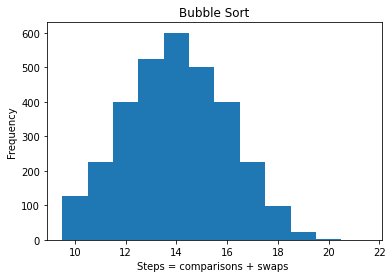

n 5
number of permutations ,n**n =  3125
exp min = 10
min formula (n-1)*n/2 = 10.0
exp max = 20
max formula (n-1)*n = 20
exp mean = 14.0
mean formula (3/4)*(n**2)-n+(1/4) = 14.0
stdev 2.0


In [17]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 

n = 5
perm = product(range(1,n+1), repeat = n)

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps = comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations ,n**n = ",n**n)
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2)-n+(1/4) =",(3/4)*(n**2)-n+(1/4))
print("stdev",np.std(times))

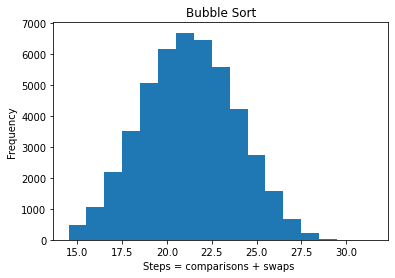

n 6
number of permutations ,n**n =  46656
exp min = 15
min formula (n-1)*n/2 = 15.0
exp max = 30
max formula (n-1)*n = 30
exp mean = 21.25
mean formula (3/4)*(n**2)-n+(1/4) = 21.25
stdev 2.624228281623776


In [18]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 

n = 6
perm = product(range(1,n+1), repeat = n)

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps = comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations ,n**n = ",n**n)
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2)-n+(1/4) =",(3/4)*(n**2)-n+(1/4))
print("stdev",np.std(times))

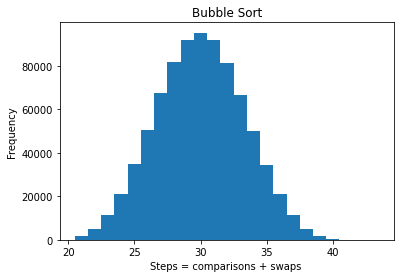

n 7
number of permutations ,n**n =  823543
exp min = 21
min formula (n-1)*n/2 = 21.0
exp max = 42
max formula (n-1)*n = 42
exp mean = 30.0
mean formula (3/4)*(n**2)-n+(1/4) = 30.0
stdev 3.295017884191656


In [19]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 

n = 7 
perm = product(range(1,n+1), repeat = n)

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps = comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations ,n**n = ",n**n)
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2)-n+(1/4) =",(3/4)*(n**2)-n+(1/4))
print("stdev",np.std(times))

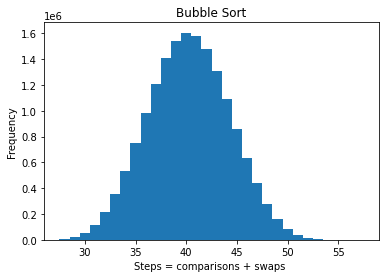

n 8
number of permutations ,n**n =  16777216
exp min = 28
min formula (n-1)*n/2 = 28.0
exp max = 56
max formula (n-1)*n = 56
exp mean = 40.25
mean formula (3/4)*(n**2)-n+(1/4) = 40.25
stdev 4.00975373308636


In [20]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np 

n = 8
perm = product(range(1,n+1), repeat = n)

times =  [] 
# Print the obtained permutations
for i in list(perm):
    i = list(i)
    times.append(bubbleSort(i))

b = np.array(range(min(times)-1,max(times)+2) ) +0.5
plt.hist(times,bins=b)
plt.title("Bubble Sort")
plt.xlabel("Steps = comparisons + swaps ")
plt.ylabel("Frequency")
plt.show()
    
print("n",n)  
print("number of permutations ,n**n = ",n**n)
print("exp min =",min(times))
print("min formula (n-1)*n/2 =",(n-1)*n/2)
print("exp max =",max(times))
print("max formula (n-1)*n =",(n-1)*n)
print("exp mean =",np.mean(times))
print("mean formula (3/4)*(n**2)-n+(1/4) =",(3/4)*(n**2)-n+(1/4))
print("stdev",np.std(times))

# Average case - expected number of comparisons + swaps on random unifrom permtation of $n$   elements with repetitions $T(n) = \frac{3}{4}n^2 - n +\frac{1}{4}= \Theta(n^2) $

In [21]:
# Average case on random unifrom permtation of  n 3/4 (**2 -n)
import numpy as np 
import pandas as pd
import scipy.linalg as la

n = np.array([3.0,4.0,5.0,6.0])    # Number n of sorted elments 
t = np.array([4.0 ,8.25,14.0,21.25]) # Average comparisons + swaps for the corresponding n 

data = pd.DataFrame({'n': n, 't': t})
data


,n,t
0,3.0,4.00
1,4.0,8.25
2,5.0,14.00
3,6.0,21.25


In [22]:
# Interpolating a polynomial of degree 3

X = np.column_stack([n**0,n**1,n**2,n**3])
a = la.solve(X,t)
a

array([ 0.25, -1.  ,  0.75,  0.  ])